In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install pydotplus

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus

You should consider upgrading via the 'c:\users\dudit\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dudit\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dudit\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dudit\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dudit\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dudit\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('forestCover3.csv')

In [3]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Area_Type,Cover_Type
0,2965.0,51,Slight,258.0,0,510,221.0,232.0,148,6279,Wilderness_Area_1,5
1,2716.0,56,Slight,212.0,-6,390,220.0,235.0,151,6225,Wilderness_Area_1,5
2,3316.0,139,Slight,268.0,65,3180,234.0,238.0,135,6121,Wilderness_Area_1,2
3,3191.0,155,Medium,242.0,118,3090,238.0,238.0,122,6211,Wilderness_Area_1,2
4,2969.0,45,Slight,153.0,-1,391,220.0,234.0,150,6172,Wilderness_Area_1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2643.0,153,Major,85.0,17,108,240.0,237.0,118,837,Wilderness_Area_3,3
581008,3030.0,152,Major,67.0,12,95,240.0,237.0,119,845,Wilderness_Area_3,3
581009,2751.0,159,Medium,60.0,7,90,236.0,241.0,130,854,Wilderness_Area_3,3
581010,2702.0,170,Medium,60.0,5,90,230.0,245.0,143,864,Wilderness_Area_3,3


In [4]:
df.isnull().sum(axis=1).value_counts()

0    387399
1    167684
2     24326
3      1563
4        40
dtype: int64

In [5]:
df['Area_Type'].value_counts()

Wilderness_Area_1    237485
Wilderness_Area_3    230331
Wilderness_Area_4     33529
Wilderness_Area_2     27215
Name: Area_Type, dtype: int64

In [6]:
print(set(df['Slope']))

{nan, 'Slight', 'Medium', 'Major'}


In [7]:
df.isnull().sum()

Elevation                              11751
Aspect                                     0
Slope                                 104758
Horizontal_Distance_To_Hydrology       11712
Vertical_Distance_To_Hydrology             0
Horizontal_Distance_To_Roadways            0
Hillshade_9am                          11860
Hillshade_Noon                         28652
Hillshade_3pm                              0
Horizontal_Distance_To_Fire_Points         0
Area_Type                              52452
Cover_Type                                 0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Area_Type,Cover_Type
0,2965.0,51,Slight,258.0,0,510,221.0,232.0,148,6279,Wilderness_Area_1,5
1,2716.0,56,Slight,212.0,-6,390,220.0,235.0,151,6225,Wilderness_Area_1,5
2,3316.0,139,Slight,268.0,65,3180,234.0,238.0,135,6121,Wilderness_Area_1,2
3,3191.0,155,Medium,242.0,118,3090,238.0,238.0,122,6211,Wilderness_Area_1,2
4,2969.0,45,Slight,153.0,-1,391,220.0,234.0,150,6172,Wilderness_Area_1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2643.0,153,Major,85.0,17,108,240.0,237.0,118,837,Wilderness_Area_3,3
581008,3030.0,152,Major,67.0,12,95,240.0,237.0,119,845,Wilderness_Area_3,3
581009,2751.0,159,Medium,60.0,7,90,236.0,241.0,130,854,Wilderness_Area_3,3
581010,2702.0,170,Medium,60.0,5,90,230.0,245.0,143,864,Wilderness_Area_3,3


In [ ]:
df

MemoryError: Unable to allocate 11.8 MiB for an array with shape (387399, 4) and data type float64

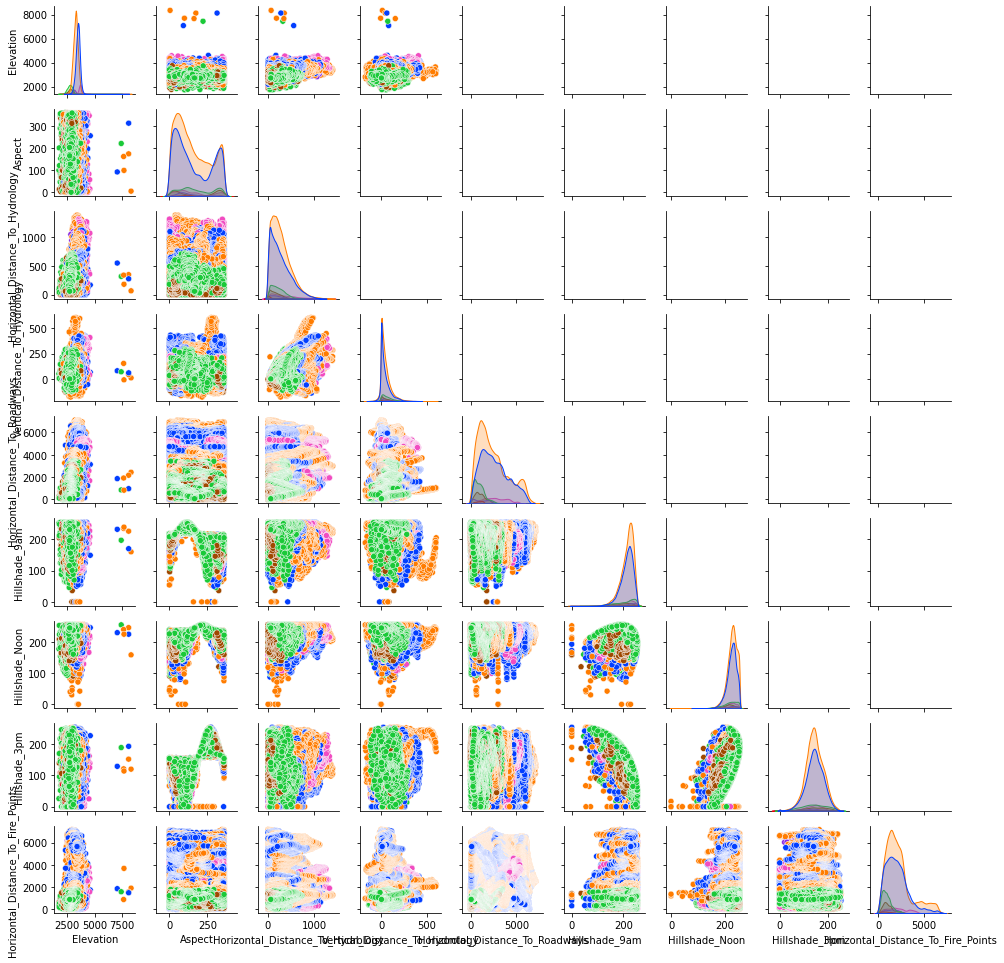

In [13]:
sns.pairplot(df, palette= 'bright' ,hue='Cover_Type', height=1.5);